# Finance project

### Imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%matplotlib inline

### Loading data

In [2]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2022, 8, 5)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584064  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227409  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270206  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220261  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241665  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224957  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249123  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345783  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382019  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756557  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104456  
2006-01-04   31.799999  31.530001  10870000.0  19.871273  
2006-01-05   31.500000  31.495001  10158000.0  19.849213  
2006-01-06   31.580000  31.680000   8403800.0  19.965801  
2006-01-09   31.674999  31.674999   5619600.0  19.962650  

[5 rows x 36 columns]

### EDA

In [8]:
#Type of data
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4177 entries, 2006-01-03 to 2022-08-05
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, High)       4177 non-null   float64
 1   (BAC, Low)        4177 non-null   float64
 2   (BAC, Open)       4177 non-null   float64
 3   (BAC, Close)      4177 non-null   float64
 4   (BAC, Volume)     4177 non-null   float64
 5   (BAC, Adj Close)  4177 non-null   float64
 6   (C, High)         4177 non-null   float64
 7   (C, Low)          4177 non-null   float64
 8   (C, Open)         4177 non-null   float64
 9   (C, Close)        4177 non-null   float64
 10  (C, Volume)       4177 non-null   float64
 11  (C, Adj Close)    4177 non-null   float64
 12  (GS, High)        4177 non-null   float64
 13  (GS, Low)         4177 non-null   float64
 14  (GS, Open)        4177 non-null   float64
 15  (GS, Close)       4177 non-null   float64
 16  (GS, Volume)      4177 n

In [9]:
#Return every 'Close' max value
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

In [10]:
#Creating a return column
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' return'] = bank_stocks[tick]['Close'].pct_change()

In [11]:
returns.head()

BAC return  C return  GS return  JPM return  MS return  WFC return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

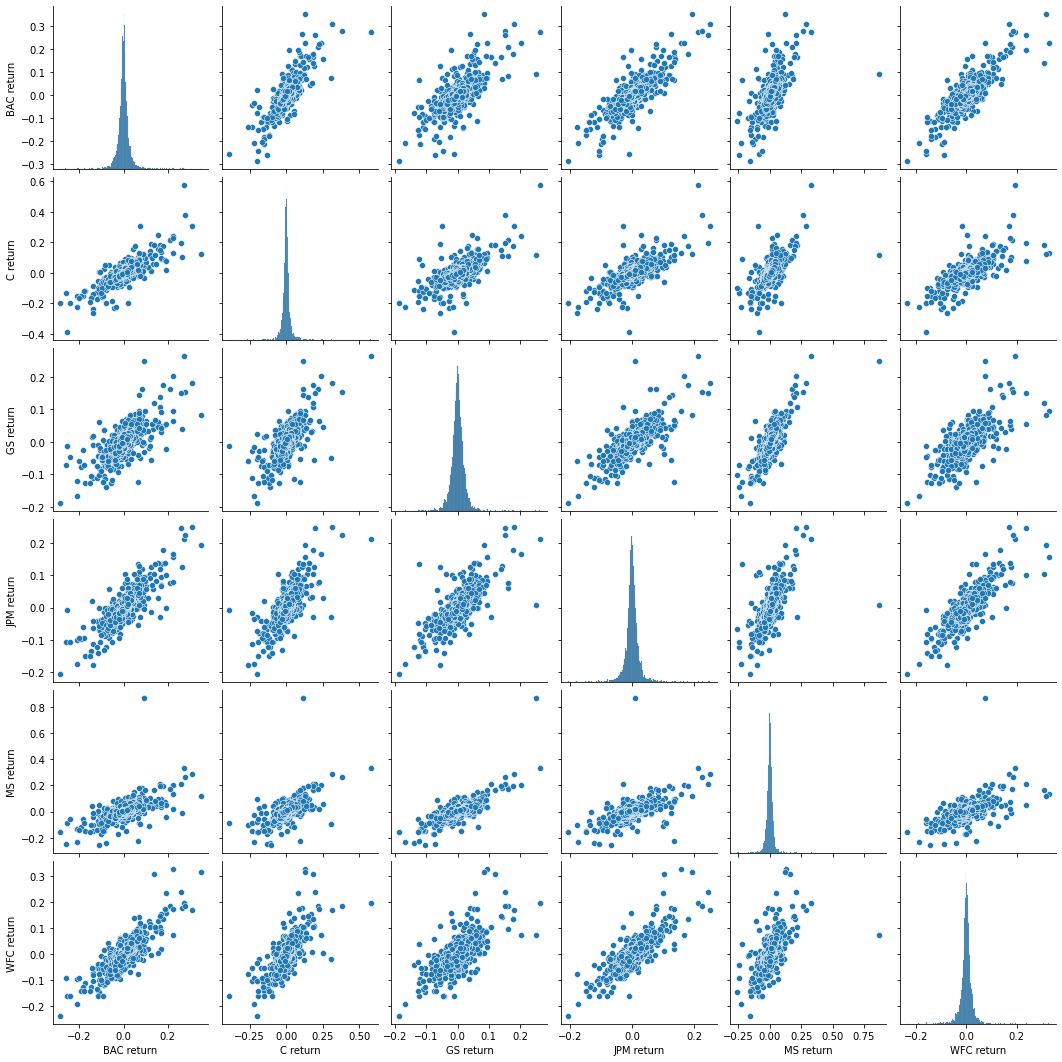

In [12]:
#Creating a visualization of the returns
sns.pairplot(data=returns[1:])

In [13]:
#Worst drop day
returns.idxmin()

BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

4 of them had the worst drop on the same date 
What happened?
https://www.theguardian.com/business/2009/jan/20/stock-market-drop-obama-inauguration

In [14]:
#Best gain day
returns.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

We can see here that 2008 had the most gain days

In [15]:
#Riskiest 
returns.std()

BAC return    0.031402
C return      0.033229
GS return     0.023212
JPM return    0.024449
MS return     0.032245
WFC return    0.027053
dtype: float64

In [16]:
returns.loc['2019-08-05':'2022-08-05'].std()

BAC return    0.025607
C return      0.028703
GS return     0.023402
JPM return    0.023415
MS return     0.025309
WFC return    0.027925
dtype: float64

In [17]:
sns.histplot(returns.loc['2019-08-05':'2022-08-05']['C return'],bins=100,kde=True)

<AxesSubplot:xlabel='C return', ylabel='Count'>

<AxesSubplot:xlabel='C return', ylabel='Count'>

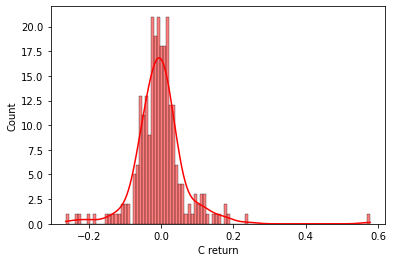

In [18]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C return'],bins=100,kde=True,color='red')

### Visualization

In [19]:
import plotly 
import cufflinks as cf

cf.go_offline()

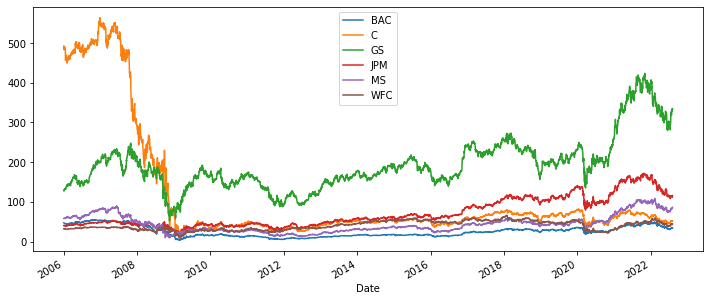

In [20]:
#Plotting the 'Close' price trough time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,5),label=tick)
    
plt.legend()

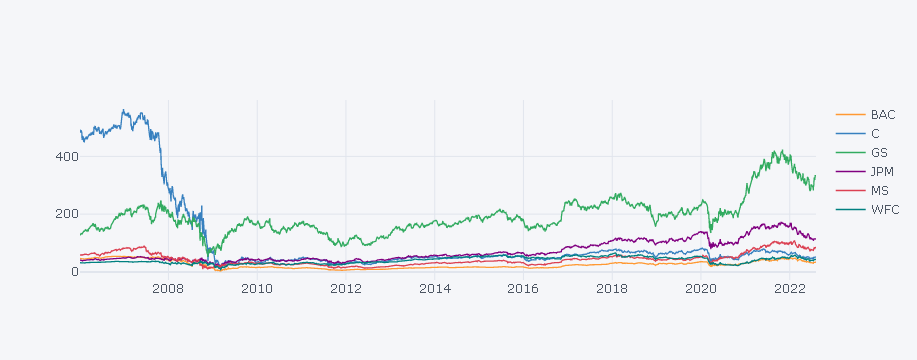

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Moving Averages (30 days)

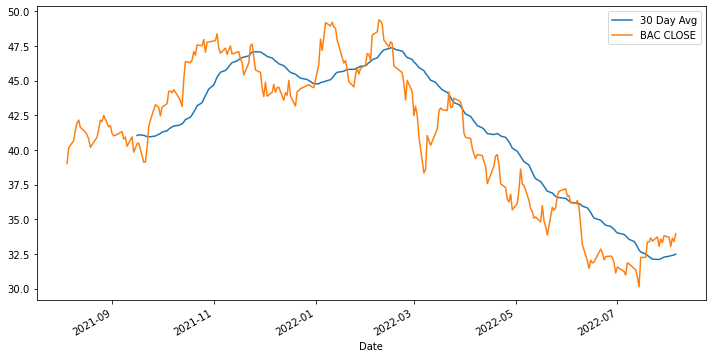

In [22]:
#Bank Of America
plt.figure(figsize=(12,6))
BAC['Close'].loc['2021-08-05':'2022-08-05'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2021-08-05':'2022-08-05'].plot(label='BAC CLOSE')
plt.legend()

In [23]:
#Citi Group
plt.figure(figsize=(12,6))
C['Close'].loc['2021-08-05':'2022-08-05'].rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].loc['2021-08-05':'2022-08-05'].plot(label='C CLOSE')
plt.legend()

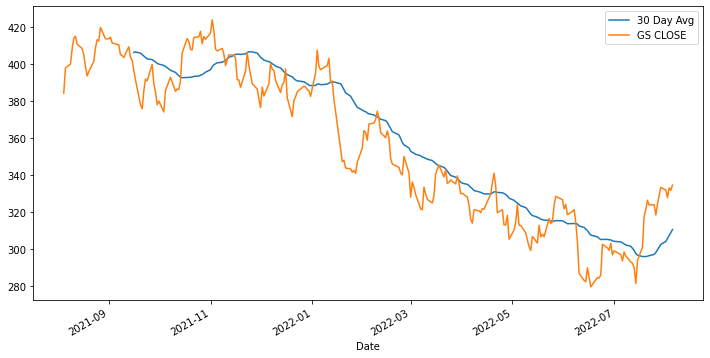

In [24]:
#Goldman Sachs
plt.figure(figsize=(12,6))
GS['Close'].loc['2021-08-05':'2022-08-05'].rolling(window=30).mean().plot(label='30 Day Avg')
GS['Close'].loc['2021-08-05':'2022-08-05'].plot(label='GS CLOSE')
plt.legend()

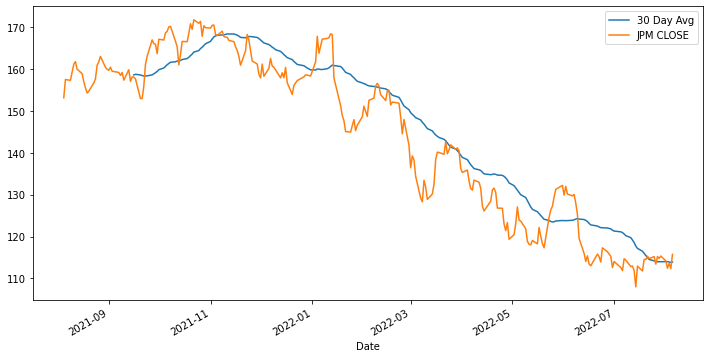

In [25]:
# PMorgan Chase
plt.figure(figsize=(12,6))
JPM['Close'].loc['2021-08-05':'2022-08-05'].rolling(window=30).mean().plot(label='30 Day Avg')
JPM['Close'].loc['2021-08-05':'2022-08-05'].plot(label='JPM CLOSE')
plt.legend()

In [26]:
#Morgan Stanley
plt.figure(figsize=(12,6))
MS['Close'].loc['2021-08-05':'2022-08-05'].rolling(window=30).mean().plot(label='30 Day Avg')
MS['Close'].loc['2021-08-05':'2022-08-05'].plot(label='MS CLOSE')
plt.legend()

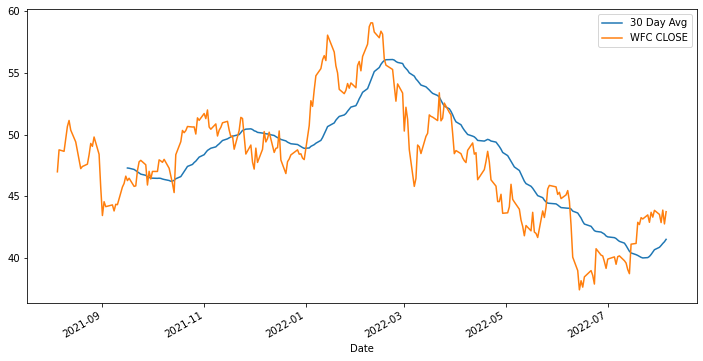

In [27]:
#Wells Fargo
plt.figure(figsize=(12,6))
WFC['Close'].loc['2021-08-05':'2022-08-05'].rolling(window=30).mean().plot(label='30 Day Avg')
WFC['Close'].loc['2021-08-05':'2022-08-05'].plot(label='WFC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

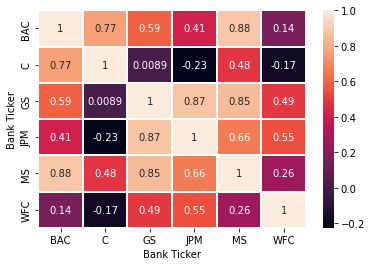

In [28]:
#Correlation between 'close' price
sns.heatmap(bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True,linewidths=0.3)

### Japanese Candlestick and Bollinger bands

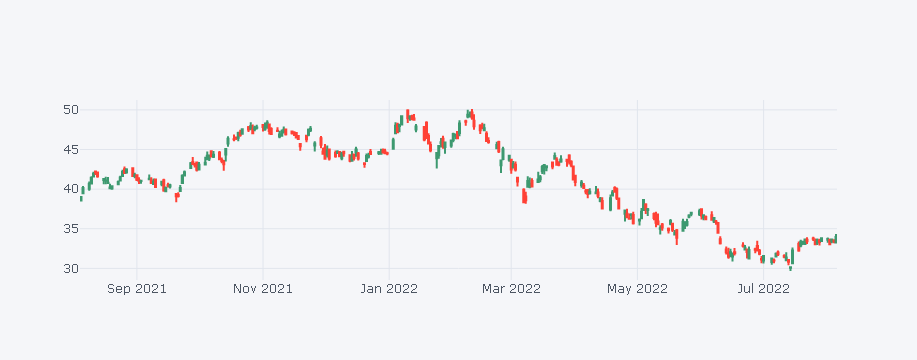

In [29]:
#Bank Of America
BAC[['Open', 'High', 'Low', 'Close']].loc['2021-08-05':'2022-08-05'].iplot(kind='candle')

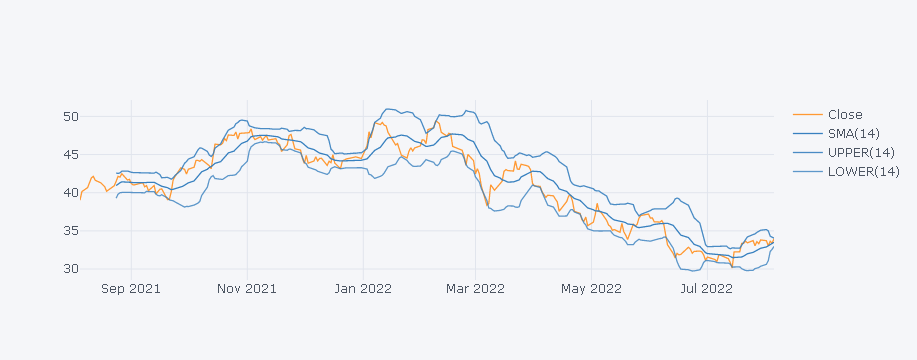

In [30]:
BAC['Close'].loc['2021-08-05':'2022-08-05'].ta_plot(study='boll')

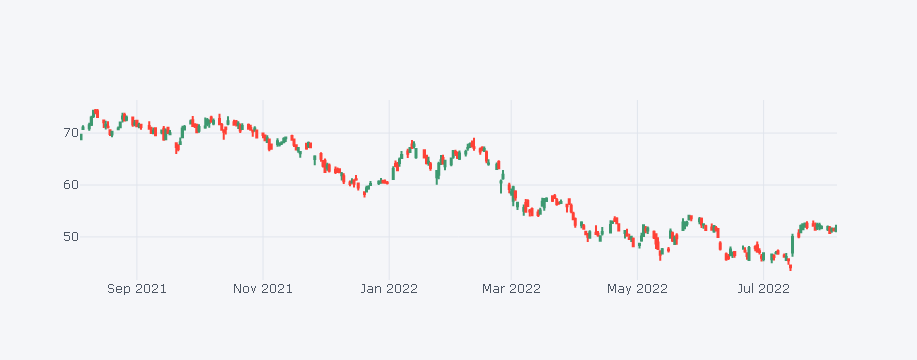

In [31]:
#CitiGroup
C[['Open', 'High', 'Low', 'Close']].loc['2021-08-05':'2022-08-05'].iplot(kind='candle')

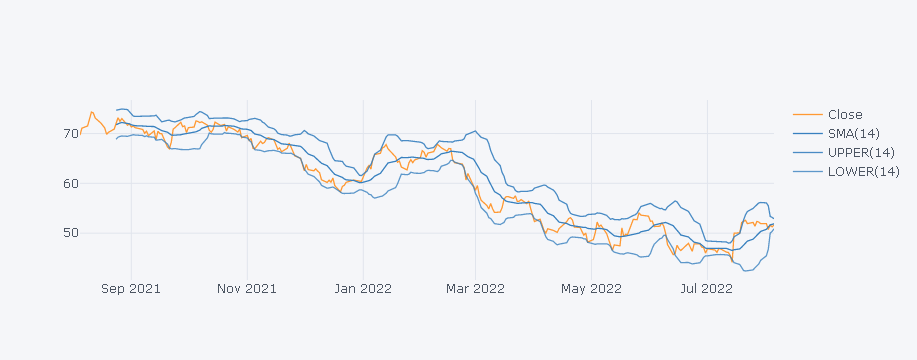

In [33]:
C['Close'].loc['2021-08-05':'2022-08-05'].ta_plot(study='boll')

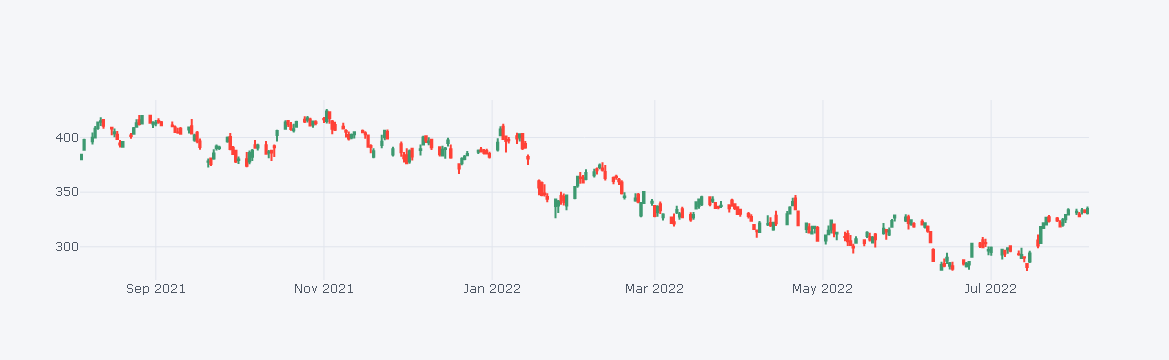

In [34]:
#Goldman Sachs
GS[['Open', 'High', 'Low', 'Close']].loc['2021-08-05':'2022-08-05'].iplot(kind='candle')

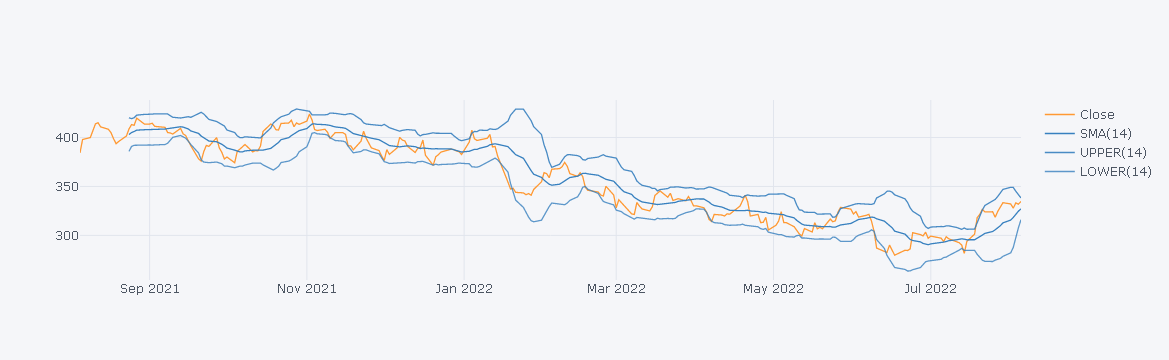

In [36]:
GS['Close'].loc['2021-08-05':'2022-08-05'].ta_plot(study='boll')

In [39]:
#JPMorgan Chase
JPM[['Open', 'High', 'Low', 'Close']].loc['2021-08-05':'2022-08-05'].iplot(kind='candle')

In [40]:
JPM['Close'].loc['2021-08-05':'2022-08-05'].ta_plot(study='boll')

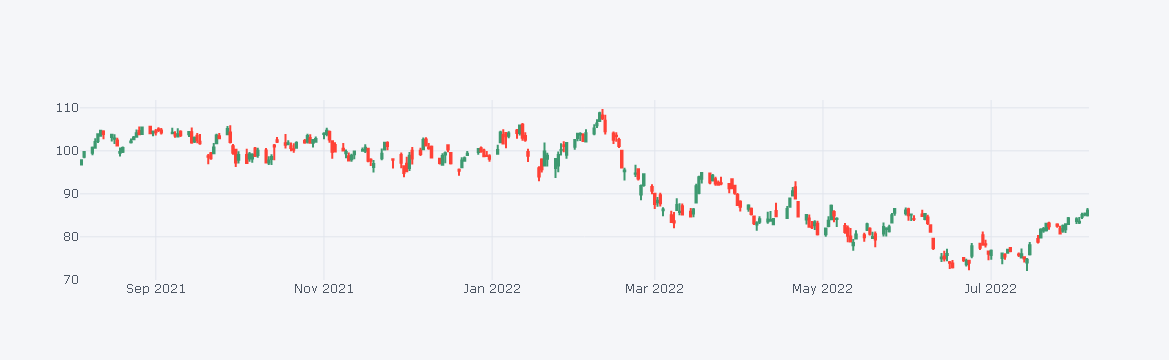

In [41]:
#Morgan Stanley
MS[['Open', 'High', 'Low', 'Close']].loc['2021-08-05':'2022-08-05'].iplot(kind='candle')

In [42]:
MS['Close'].loc['2021-08-05':'2022-08-05'].ta_plot(study='boll')

In [43]:
WFC[['Open', 'High', 'Low', 'Close']].loc['2021-08-05':'2022-08-05'].iplot(kind='candle')

In [44]:
WFC['Close'].loc['2021-08-05':'2022-08-05'].ta_plot(study='boll')